In [17]:
import pandas as pd


files = ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']
dataframes = []

for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)

df_combined = pd.concat(dataframes)

print(df_combined.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.6

In [19]:
happiest_country = df_combined.loc[df_combined['Happiness Score'].idxmax()]
print(f"En mutlu ülke: {happiest_country['Country']} - Puan: {happiest_country['Happiness Score']}")

factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

for factor in factors:
    highest_factor = df_combined.loc[df_combined[factor].idxmax()]
    print(f"{factor} en yüksek puanı alan ülke: {highest_factor['Country']} - Puan: {highest_factor[factor]}")


En mutlu ülke: 0    Switzerland
0        Denmark
0         Norway
0            NaN
0            NaN
Name: Country, dtype: object - Puan: 0    7.587
0    7.526
0      NaN
0      NaN
0      NaN
Name: Happiness Score, dtype: float64
Economy (GDP per Capita) en yüksek puanı alan ülke: 35       Spain
35       Qatar
35    Colombia
35         NaN
35         NaN
Name: Country, dtype: object - Puan: 35    1.23011
35    1.82427
35        NaN
35        NaN
35        NaN
Name: Economy (GDP per Capita), dtype: float64
Family en yüksek puanı alan ülke: 2    Denmark
2    Iceland
2    Iceland
2        NaN
2        NaN
Name: Country, dtype: object - Puan: 2    1.360580
2    1.183260
2    1.610574
2         NaN
2         NaN
Name: Family, dtype: float64
Health (Life Expectancy) en yüksek puanı alan ülke: 23    Singapore
23        Chile
23    Argentina
23          NaN
23          NaN
Name: Country, dtype: object - Puan: 23    1.02525
23    0.81883
23        NaN
23        NaN
23        NaN
Name: Health (L

In [45]:
df_2015 = df_combined[df_combined['Year'] == 2015]
df_2016 = df_combined[df_combined['Year'] == 2016]

comparison = df_2015[['Country', 'Happiness Score']].merge(df_2016[['Country', 'Happiness Score']], on='Country', suffixes=('_2015', '_2016'))

comparison['Score Change'] = comparison['Happiness Score_2016'] - comparison['Happiness Score_2015']

most_improved = comparison.sort_values(by='Score Change', ascending=False).head(10)
most_declined = comparison.sort_values(by='Score Change').head(10)

print("En çok gelişen ülkeler:")
print(most_improved)

print("En çok düşüş yaşayan ülkeler:")
print(most_declined)

En çok gelişen ülkeler:
                Country  Happiness Score_2015  Happiness Score_2016  \
66              Algeria                 5.605                 6.355   
150                Togo                 2.839                 3.303   
87               Latvia                 5.098                 5.560   
84              Romania                 5.124                 5.528   
98              Hungary                 4.800                 5.145   
135             Senegal                 3.904                 4.219   
101             Tunisia                 4.739                 5.045   
97              Lebanon                 4.839                 5.129   
115               Nepal                 4.514                 4.793   
93   Dominican Republic                 4.885                 5.155   

     Score Change  
66          0.750  
150         0.464  
87          0.462  
84          0.404  
98          0.345  
135         0.315  
101         0.306  
97          0.290  
115         0.

C:\Users\irem.DESKTOP-LHEJL7N\AppData\Local\Temp\ipykernel_10468\3901101415.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score Change', y='Country', data=most_improved, palette='viridis')
C:\Users\irem.DESKTOP-LHEJL7N\AppData\Local\Temp\ipykernel_10468\3901101415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score Change', y='Country', data=most_declined, palette='viridis')


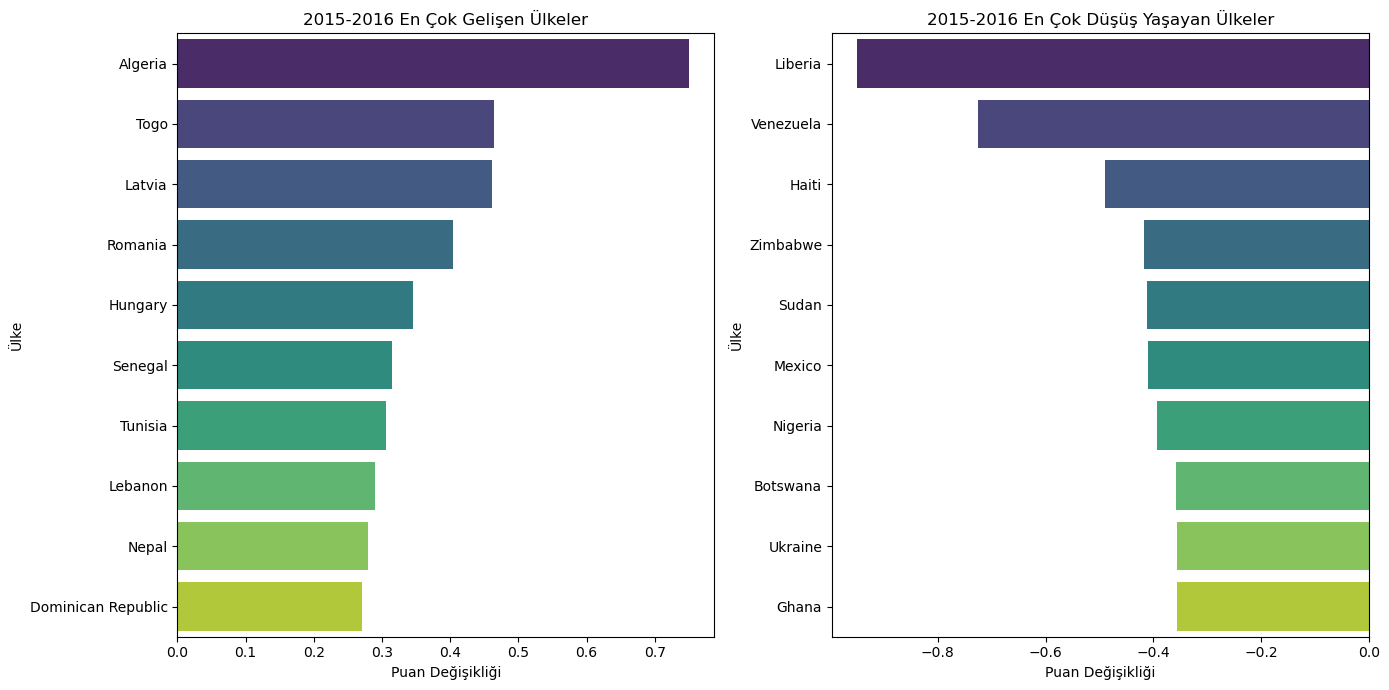

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))

# En çok gelişen ülkeler grafiği
plt.subplot(1, 2, 1)
sns.barplot(x='Score Change', y='Country', data=most_improved, palette='viridis', legend=False)
plt.title('2015-2016 En Çok Gelişen Ülkeler')
plt.xlabel('Puan Değişikliği')
plt.ylabel('Ülke')

# En çok düşüş yaşayan ülkeler grafiği
plt.subplot(1, 2, 2)
sns.barplot(x='Score Change', y='Country', data=most_declined, palette='viridis')
plt.title('2015-2016 En Çok Düşüş Yaşayan Ülkeler')
plt.xlabel('Puan Değişikliği')
plt.ylabel('Ülke')

plt.tight_layout()
plt.show()
